Wytrenowane parametry theta:
[[-13.84819568]
 [  5.34143242]]
2.592599622492157
[0.5]


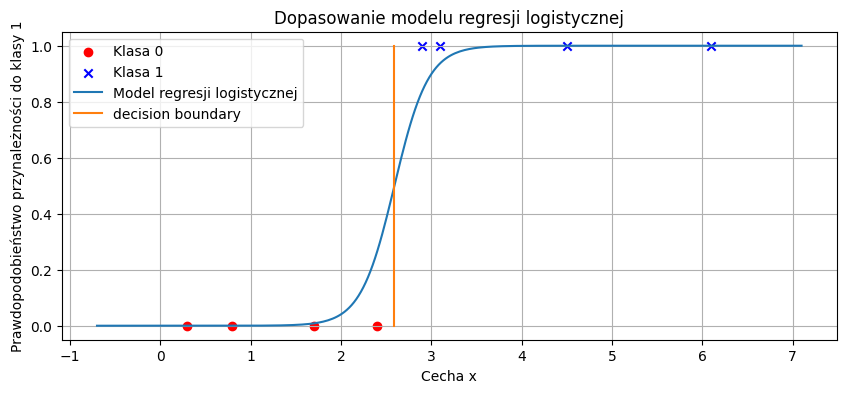

In [ ]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    return (y_1 + y_0).sum() / X.shape[1]

X = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
              [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])
y = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])

def gradient_descent(X, y, theta, alpha, eps, max_iter=10000):
    m = y.shape[1]
    previous_cost = calculate_cost(X, y, theta)
    for i in range(max_iter):
        h_y_diff = h_fun(X, theta) - y
        gradient = (h_y_diff @ X.T) / m
        theta -= alpha * gradient.T
        current_cost = calculate_cost(X, y, theta)
        if abs(previous_cost - current_cost) < eps:
            break
        previous_cost = current_cost
    return theta



alpha = 0.1           # współczynnik uczenia
num_iterations = 10000  # liczba iteracji

# Inicjalizacja parametrów theta (dla 2 cech, w tym biasu)
theta = np.zeros((2, 1))

m = X.shape[1]  # liczba przykładów

# Pętla gradient descent
for i in range(num_iterations):
    h = h_fun(X, theta)               # Oblicz aktualne przewidywania
    gradient = (X @ (h - y).T) / m      # Oblicz gradient (wymiar: (2,1))
    theta = theta - alpha * gradient  # Aktualizacja parametrów
    cost = calculate_cost(X, y, theta)

print("Wytrenowane parametry theta:")
print(theta)
val05=float(theta[0]/theta[1]*(-1))
y_05=[0,1]
x_05=[val05,val05]

print(val05)
# Wizualizacja dopasowania modelu
# Rysujemy punkty danych – jako mamy jedną cechę, wykorzystamy ją na osi x
x_vals = X[1, :]

# Punkty klasy 0 i klasy 1
plt.figure(figsize=(10,4))
plt.scatter(x_vals[y.flatten() == 0], y.flatten()[y.flatten() == 0], 
            color='red', marker='o', label='Klasa 0')
plt.scatter(x_vals[y.flatten() == 1], y.flatten()[y.flatten() == 1], 
            color='blue', marker='x', label='Klasa 1')

# Rysujemy krzywą sigmoidalną modelu
x_range = np.linspace(np.min(x_vals) - 1, np.max(x_vals) + 1, 300)
# Tworzymy macierz z biasem i cechą
X_plot = np.vstack((np.ones(x_range.shape), x_range))
y_plot = h_fun(X_plot, theta).flatten()
val=h_fun([1,val05],theta)
print(val)
plt.plot(x_range, y_plot, label='Model regresji logistycznej')
plt.plot(x_05,y_05,label='decision boundary')
plt.xlabel("Cecha x")
plt.ylabel("Prawdopodobieństwo przynależności do klasy 1")
plt.title("Dopasowanie modelu regresji logistycznej")
plt.legend()
plt.grid(True)
plt.show()

X.shape=(3, 100)
y.shape=(1, 100)


C:\Users\Szymon\AppData\Local\Temp\ipykernel_14684\3024844413.py:14: RuntimeWarning: divide by zero encountered in log
  y_0 = -(1-y)*np.log(1-h)
C:\Users\Szymon\AppData\Local\Temp\ipykernel_14684\3024844413.py:14: RuntimeWarning: invalid value encountered in multiply
  y_0 = -(1-y)*np.log(1-h)


Wytrenowane parametry theta:
[[-76.84774018]
 [  4.13667347]
 [ -0.60568949]]
18.577183018012047


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

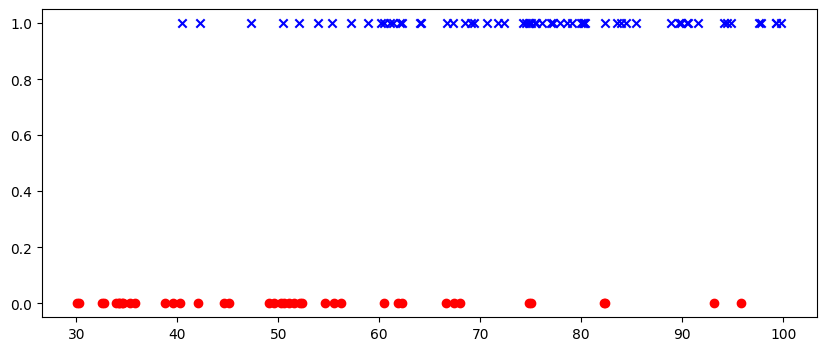

In [ ]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x = data[:, :2].T
    X = np.concatenate([np.ones([1, x.shape[1]]), x])
 
print(f'{X.shape=}')
print(f'{y.shape=}')

alpha = 0.1        
num_iterations = 10000  

theta = np.zeros((3, 1))
m = X.shape[1]  


for i in range(num_iterations):
    h = h_fun(X, theta)               
    gradient = (X @ (h - y).T) / m      
    theta = theta - alpha * gradient  
    cost = calculate_cost(X, y, theta)

print("Wytrenowane parametry theta:")
print(theta)
val05=float(theta[0]/theta[1]*(-1))
y_05=[0,1]
x_05=[val05,val05]

print(val05)

x_vals = X[1, :]

plt.figure(figsize=(10,4))
plt.scatter(x_vals[y.flatten() == 0], y.flatten()[y.flatten() == 0], 
            color='red', marker='o', label='Klasa 0')
plt.scatter(x_vals[y.flatten() == 1], y.flatten()[y.flatten() == 1], 
            color='blue', marker='x', label='Klasa 1')

x_range = np.linspace(np.min(x_vals) - 1, np.max(x_vals) + 1, 300)

X_plot = np.vstack((np.ones(x_range.shape), x_range))
y_plot = h_fun(X_plot, theta).flatten()
val=h_fun([1,val05],theta)
print(val)
plt.plot(x_range, y_plot, label='Model regresji logistycznej')
plt.plot(x_05,y_05,label='decision boundary')
plt.xlabel("Cecha x")
plt.ylabel("Prawdopodobieństwo przynależności do klasy 1")
plt.title("Dopasowanie modelu regresji logistycznej")
plt.legend()
plt.grid(True)
plt.show()

x1_db = np.arange(X[1, :].min(), X[1, :].max(), 1)
x2_db = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0]*x1_db
plt.plot(x1_db, x2_db, '-m')